In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from itertools import cycle
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import precision_score
from sklearn import svm, tree, preprocessing
from IPython.display import Image 
import pydotplus
%pylab inline
fileURL ='car.data.txt'
data = pd.read_csv(fileURL, names=['buying','maint','doors','persons','lug_boot','safety','acceptability'], header=None, delimiter=",")

Populating the interactive namespace from numpy and matplotlib


/Users/CherylRuo/Documents/anaconda/lib/python3.5/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['colors', 'clf']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [32]:
data.describe()

,acceptability
count,1728.000000
mean,0.077546
std,0.267534
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [33]:
lex = preprocessing.LabelEncoder()
w = data.ix[:,0:6].as_matrix()
nw = lex.fit_transform(w[0])
for i in w[1:]:
    nw = np.vstack([nw, lex.fit_transform(i)])
transformed_data = pd.DataFrame(nw, columns=data.columns[0:6])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11ef9a860>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11e6840f0>]], dtype=object)

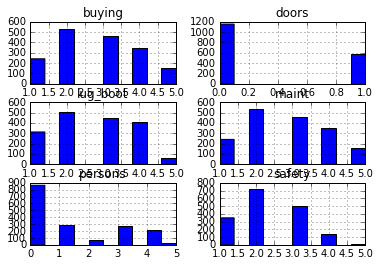

In [34]:
transformed_data.hist()

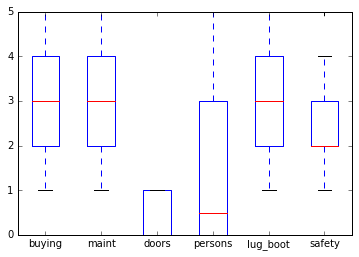

In [35]:
transformed_data.plot(kind='box')

In [36]:
features = transformed_data.columns
print("* features:", features, sep="\n")

* features:
Index(['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'], dtype='object')


In [37]:
ley = preprocessing.LabelEncoder()
Y = data['acceptability'].as_matrix()
Y = ley.fit_transform(Y)
X = transformed_data[features]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [38]:
clf = tree.DecisionTreeClassifier()
fit_result = clf.fit(X_train, Y_train)

In [39]:
clf.score(X_test, Y_test)

0.93520140105078808

1.The accuracy of your model on the test data
Answer: According to clf.score, the accuracy is 93.5%.

In [40]:
Y_true = Y_test
Y_pred = clf.predict(X_test)
precision_score(Y_true, Y_pred, average='macro')

0.80682510664229135

3.A classification report (scikit-learn has a function that can create this for you)

In [41]:
target_names = ['0','1']
print(classification_report(Y_true, Y_pred, target_names=target_names))

             precision    recall  f1-score   support

          0       0.95      0.98      0.97       526
          1       0.67      0.36      0.46        45

avg / total       0.92      0.94      0.93       571



4.The confusion matrix for this experiment

In [42]:
confusion_matrix(Y_true, Y_pred, labels=[0,1])

array([[518,   8],
       [ 29,  16]])

6.A Precision/Recall curve

In [43]:
colors = cycle(['navy', 'turquoise', 'darkorange', 'cornflowerblue', 'teal'])
lw = 2
Y = label_binarize(Y, classes=[0, 1])
n_classes = Y.shape[1]
# Add noisy features
random_state = np.random.RandomState(0)
n_samples, n_features = X.shape
X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]

# Split into training and test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.5,
                                                    random_state=random_state)
classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True,
                                 random_state=random_state))
Y_score = classifier.fit(X_train, Y_train).decision_function(X_test)

In [44]:
precision = dict()
recall = dict()
average_precision = dict()
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(Y_test[:, i],
                                                        Y_score[:, i])
    average_precision[i] = average_precision_score(Y_test[:, i], Y_score[:, i])

# Compute micro-average ROC curve and ROC area
precision["micro"], recall["micro"], _ = precision_recall_curve(Y_test.ravel(),
    Y_score.ravel())
average_precision["micro"] = average_precision_score(Y_test, Y_score,
                                                     average="micro")

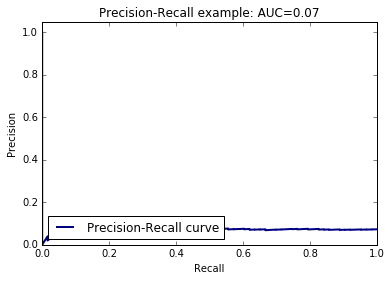

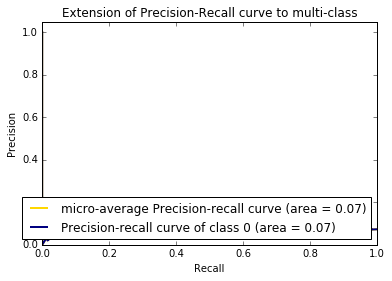

In [45]:
# Plot Precision-Recall curve
plt.clf()
plt.plot(recall[0], precision[0], lw=lw, color='navy',
         label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall example: AUC={0:0.2f}'.format(average_precision[0]))
plt.legend(loc="lower left")
plt.show()

# Plot Precision-Recall curve for each class
plt.clf()
plt.plot(recall["micro"], precision["micro"], color='gold', lw=lw,
         label='micro-average Precision-recall curve (area = {0:0.2f})'
               ''.format(average_precision["micro"]))
for i, color in zip(range(n_classes), colors):
    plt.plot(recall[i], precision[i], color=color, lw=lw,
             label='Precision-recall curve of class {0} (area = {1:0.2f})'
                   ''.format(i, average_precision[i]))

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Extension of Precision-Recall curve to multi-class')
plt.legend(loc="lower right")
plt.show()

5.An ROC curve

In [50]:
Y = data['acceptability'].as_matrix()
Y = ley.fit_transform(Y)
X = transformed_data[features]
# Binarize the output
Y = label_binarize(Y, classes=[0, 1])
n_classes = Y.shape[1]

# Add noisy features to make the problem harder
random_state = np.random.RandomState(0)
n_samples, n_features = X.shape
X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]

# shuffle and split training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.5,
                                                    random_state=0)

# Learn to predict each class against the other
classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True,
                                 random_state=random_state))
Y_score = classifier.fit(X_train, Y_train).decision_function(X_test)


In [51]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(Y_test[:, i], Y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(Y_test.ravel(), Y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

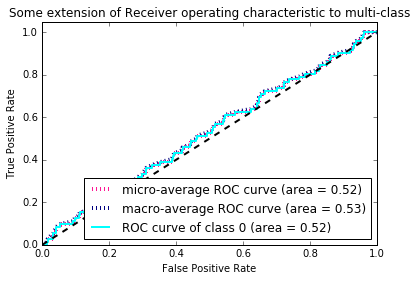

In [53]:
# Compute macro-average ROC curve and ROC area

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()